# Анализ данных интернет-магазина «Стримчик»

Анализ данных интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  Нужно выявить определяющие успешность игры закономерности,чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откройте файл с данными и изучите общую информацию 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('C:/Users/mrsag/Desktop/Аналитик буткемп/Проекты/Сборный проект/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
games.isna().mean().sort_values(ascending=False)*100

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64

In [8]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

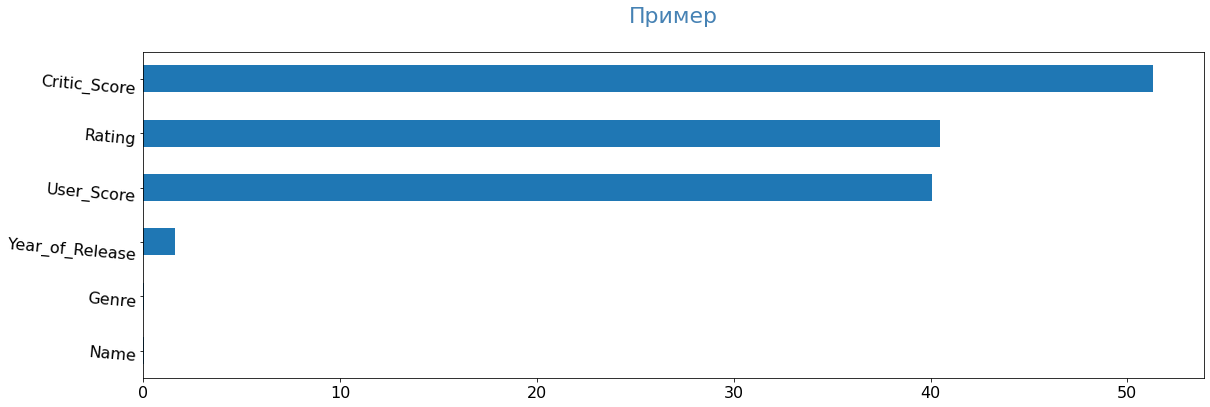

In [9]:
pass_value_barh(games)

In [10]:
games.duplicated().sum()

0

In [1]:
games.duplicat(subset=['name', 'platform', 'year_of_release'])

NameError: name 'games' is not defined

Изучив информацию, могу сказать что:
1. Необходимо заменить названия столбцов
2. Есть пропущенные значения в столбцах year_of_release, critic_score, user_score, rating  
3. Дубликатов не выявлено 
4. Необходимо заменить тип данных в стоблце user_score и year_of_release

### Подготовьте данные

*1. Замена названия столбцов*

In [11]:
games.columns = games.columns.str.lower() 

*2. Преобразование данных в нужный тип*

In [12]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype(float)

*3. Удаление строк в столбцах с пропущенными значениями*

In [13]:
games.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [14]:
games['year_of_release'] = games['year_of_release'].astype(int)

*4. Подсчет суммарных продаж во всех регионах*

In [15]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [16]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


1. Заполнять попуски в critic_score, user_score будет некорректно, так как в этом случае мы получим неточные результаты в анализе. Пропуски в rating заполнила значением ND
2. Удалила строки в столбцах 'name', 'genre', 'year_of_release', так как пропущенных значений немного, они не будут влиять на результат
4. Причины, которые привели к пропускам могут быть как ошибкой, так и отсутсвие данных о рейтинге вследствие непопуярности игры

In [17]:
games['rating'] = games['rating'].fillna('ND')

In [18]:
# check
games['rating'].value_counts()

ND      6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


# Проведите исследовательский анализ данных

*1. Анализ продаж платформ в разные периоды*

In [20]:
release_game = games.groupby('year_of_release')['name'].count().sort_values(ascending=False)
release_game.head(10)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

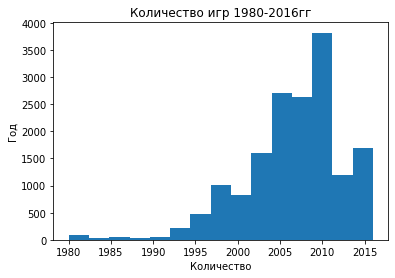

In [21]:
plt.hist(games['year_of_release'], bins=15, range=(1980,2016))
plt.title('Количество игр 1980-2016гг')
plt.xlabel('Количество')
plt.ylabel('Год')
plt.show()

На основании сортирования данных и построенного графика можно сказать, что наиболее важные для анализа данные за 2006-2011 гг.
Наибольшие значение мы видим в 2008, 2009 гг

In [22]:
platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

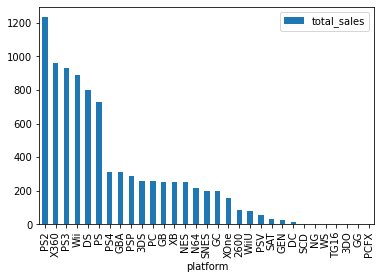

In [23]:
platforms.plot(kind='bar', legend=True);

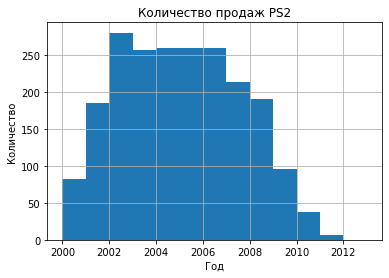

In [24]:
games[games['platform']=='PS2']['year_of_release'].hist(bins=13, range=(2000,2013));
plt.title('Количество продаж PS2')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

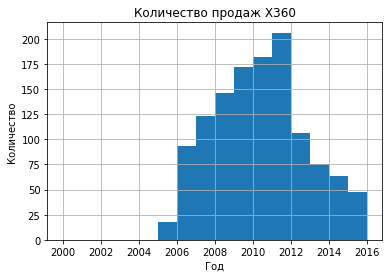

In [25]:
games[games['platform']=='X360']['year_of_release'].hist(bins=16, range=(2000,2016));
plt.title('Количество продаж X360')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

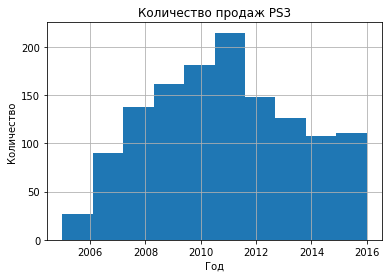

In [26]:
games[games['platform']=='PS3']['year_of_release'].hist(bins=10, range=(2005,2016));
plt.title('Количество продаж PS3')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

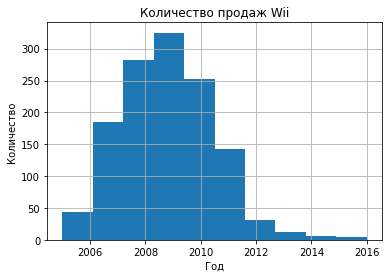

In [27]:
games[games['platform']=='Wii']['year_of_release'].hist(bins=10, range=(2005,2016));
plt.title('Количество продаж Wii')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

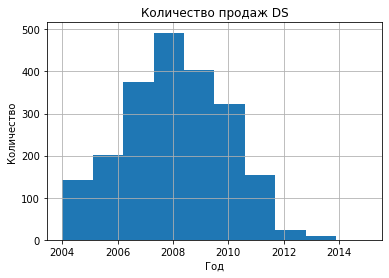

In [28]:
games[games['platform']=='DS']['year_of_release'].hist(bins=10, range=(2004,2015));
plt.title('Количество продаж DS')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

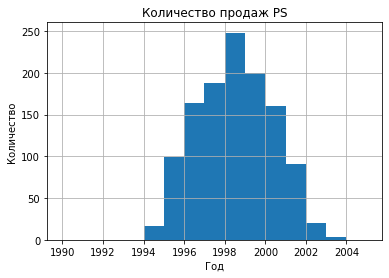

In [29]:
games[games['platform']=='PS']['year_of_release'].hist(bins=15, range=(1990,2005));
plt.title('Количество продаж PS')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

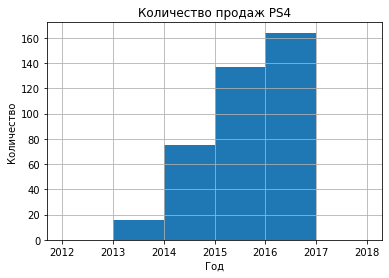

In [30]:
games[games['platform']=='PS4']['year_of_release'].hist(bins=6, range=(2012,2018));
plt.title('Количество продаж PS4')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

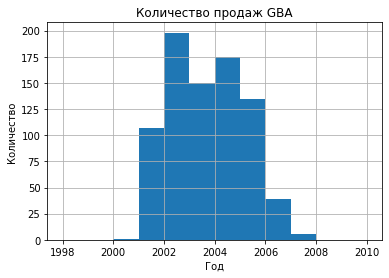

In [31]:
games[games['platform']=='GBA']['year_of_release'].hist(bins=12, range=(1998,2010));
plt.title('Количество продаж GBA')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

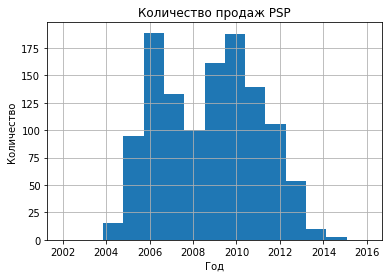

In [32]:
games[games['platform']=='PSP']['year_of_release'].hist(bins=15, range=(2002,2016));
plt.title('Количество продаж PSP')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

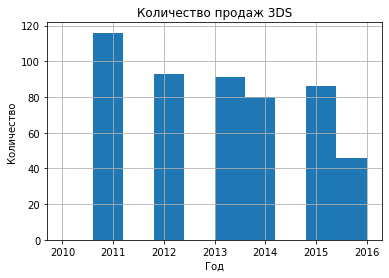

In [33]:
games[games['platform']=='3DS']['year_of_release'].hist(bins=10, range=(2010,2016));
plt.title('Количество продаж 3DS')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Наиболее популярные платформы по продажам: PS2, X360, PS3, Wii, DS. В среднем платформы существуют около 10 лет. Большинство платформ появилось в 2000-х.

In [34]:
games_new = games.query('year_of_release>2013')

In [35]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,ND,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,ND,7.98


In [36]:
games_actually = games_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
games_actually.head(10)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

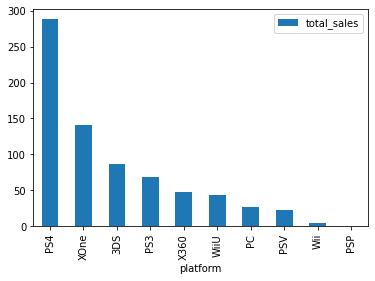

In [37]:
games_actually.plot(kind='bar', legend=True);

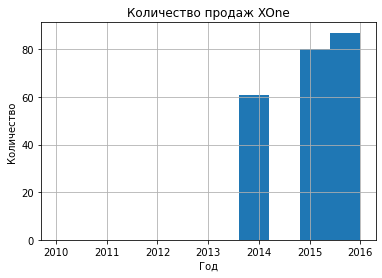

In [38]:
games_new[games_new['platform']=='XOne']['year_of_release'].hist(bins=10, range=(2010,2016));
plt.title('Количество продаж XOne')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

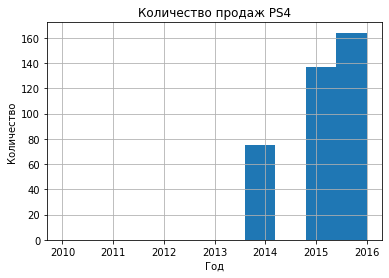

In [39]:
games_new[games_new['platform']=='PS4']['year_of_release'].hist(bins=10, range=(2010,2016));
plt.title('Количество продаж PS4')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

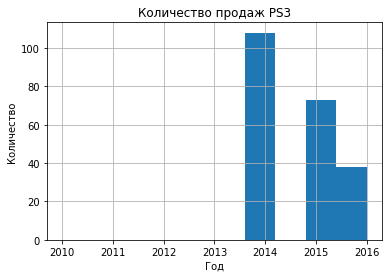

In [40]:
games_new[games_new['platform']=='PS3']['year_of_release'].hist(bins=10, range=(2010,2016));
plt.title('Количество продаж PS3')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

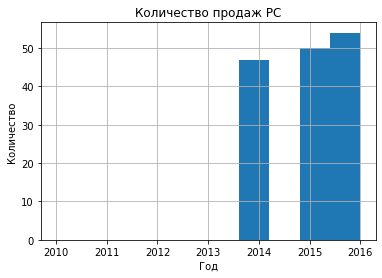

In [41]:
games_new[games_new['platform']=='PC']['year_of_release'].hist(bins=10, range=(2010,2016));
plt.title('Количество продаж PC')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

На основании данных за последние 3 года, лидируют по продажам: PS4, XOne. PC имеет тенденцию к росту к 2016 году

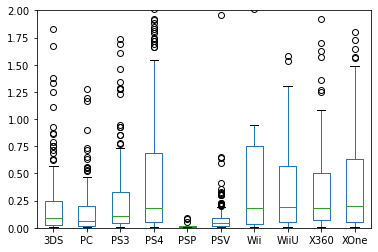

In [42]:
games_new.pivot_table(index = 'name', columns = 'platform', values = 'total_sales').plot(kind='box', ylim=(0,2));

PS4 и XOne остаются в лидирующих позициях, так как выброс данных минимальный, что говорит о популярности их игр, в отличие, например, от 3DS у которых высокий объем продаж засчет выброса (1-2 суперпопулярных игр)

In [43]:
games_new.pivot_table(index = 'name', columns = 'platform', values = 'total_sales')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12-Sai. Honto no Kimochi,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12-Sai. Koisuru Diary,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Zettai Kaikyuu Gakuen: Eden with Roses and Phantasm,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN
ZombiU,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN,0.01
Zombie Army Trilogy,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN,0.11


*2.Корреляция между отзывами и продажами*

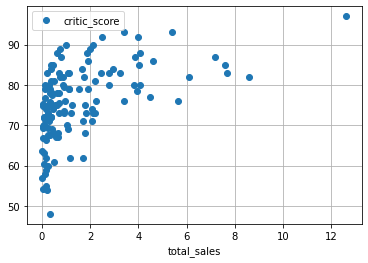

In [44]:
games_new[games_new['platform']=='PS4'].pivot_table(index='total_sales', values= 'critic_score')\
.plot(grid=True, style='o');

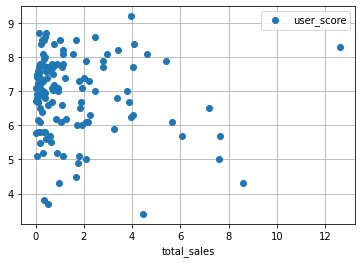

In [45]:
games_new[games_new['platform']=='PS4'].pivot_table(index='total_sales', values= 'user_score')\
.plot(grid=True, style='o');

In [46]:
games_corr_PS4 = games_new.query('platform == "PS4"') 

print(f'Корреляция между оценкой критиков и продажами: \
{games_corr_PS4.critic_score.corr(games_corr_PS4.total_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: \
{games_corr_PS4.user_score.corr(games_corr_PS4.total_sales):.2}')
print(f'Корреляция между оценками критиков и пользователей: \
{games_corr_PS4.critic_score.corr(games_corr_PS4.user_score):.2}')

Корреляция между оценкой критиков и продажами: 0.4
Корреляция между оценкой пользователей и продажами: -0.04
Корреляция между оценками критиков и пользователей: 0.55


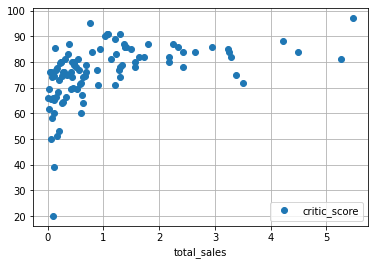

In [47]:
games_new[games_new['platform']=='XOne'].pivot_table(index='total_sales', values='critic_score')\
.plot(grid=True, style='o');

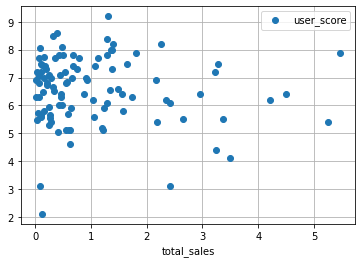

In [48]:
games_new[games_new['platform']=='XOne'].pivot_table(index='total_sales', values='user_score')\
.plot(grid=True, style='o');

In [49]:
games_corr_XOne = games_new.query('platform == "XOne"') 

print(f'Корреляция между оценкой критиков и продажами: \
{games_corr_XOne.critic_score.corr(games_corr_XOne.total_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: \
{games_corr_XOne.user_score.corr(games_corr_XOne.total_sales):.2}')
print(f'Корреляция между оценками критиков и пользователей: \
{games_corr_XOne.critic_score.corr(games_corr_XOne.user_score):.2}')

Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: -0.07
Корреляция между оценками критиков и пользователей: 0.44


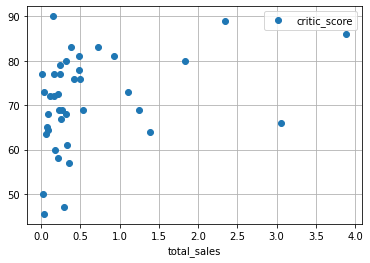

In [50]:
games_new[games_new['platform']=='3DS'].pivot_table(index='total_sales', values='critic_score')\
.plot(grid=True, style='o');

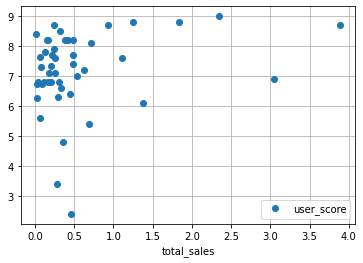

In [51]:
games_new[games_new['platform']=='3DS'].pivot_table(index='total_sales', values='user_score')\
.plot(grid=True, style='o');

In [52]:
games_corr_3DS = games_new.query('platform == "3DS"') 

print(f'Корреляция между оценкой критиков и продажами: \
{games_corr_3DS.critic_score.corr(games_corr_3DS.total_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: \
{games_corr_3DS.user_score.corr(games_corr_3DS.total_sales):.2}')
print(f'Корреляция между оценками критиков и пользователей: \
{games_corr_3DS.critic_score.corr(games_corr_3DS.user_score):.2}')

Корреляция между оценкой критиков и продажами: 0.31
Корреляция между оценкой пользователей и продажами: 0.22
Корреляция между оценками критиков и пользователей: 0.86


По платформам PS4, XOne можно сказать, что оценки критиков влияют на продажи, в отличие от оценок пользователей, которые не принимают во внимание

3. *Общее распределение игр по жанрам*

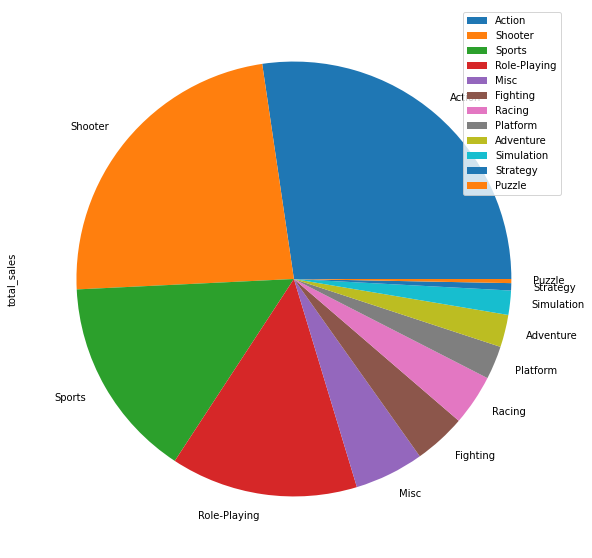

In [53]:
games_new.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales').plot(kind='pie', figsize=(10,10), y= 'total_sales');

In [54]:
games_new.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Можно выделить жанры с с высокими продажами: Action, Shooter, Sports, и с низкими: Strategy, Puzzle

In [55]:
genres_mean = games_new.pivot_table(index='genre', values='total_sales', aggfunc= 'mean')\
.sort_values('total_sales',ascending=False).reset_index()
genres_mean

,genre,total_sales
0,Shooter,1.335469
1,Sports,0.680000
2,Platform,0.476053
3,Fighting,0.470333
4,Role-Playing,0.459005
5,Racing,0.398841
6,Misc,0.332301
7,Action,0.322068
8,Simulation,0.298409
9,Puzzle,0.157857


In [56]:
genres_median = games_new.pivot_table(index='genre', values='total_sales', aggfunc= 'median')\
.sort_values('total_sales',ascending=False).reset_index()
genres_median

,genre,total_sales
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


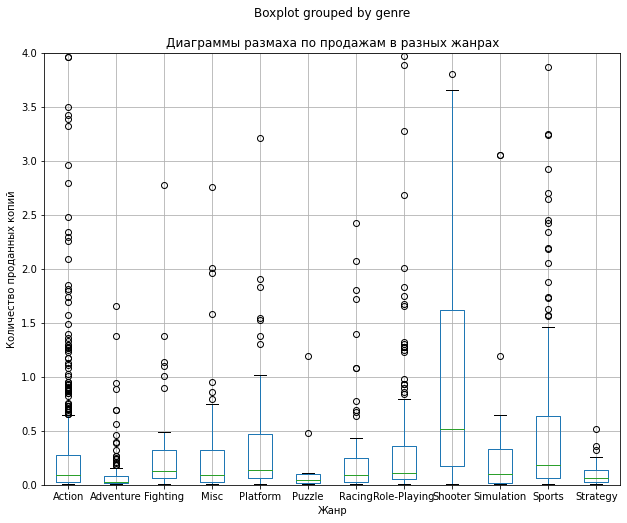

In [57]:
games_new[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,8))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 4)
plt.show()

По диаграмме размаха могу сказать, что продажи в жанре Shooter стабильны, Action и Sport имеют большое количесво выбросов

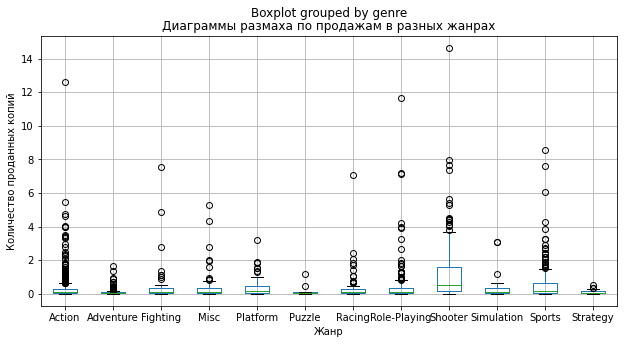

In [58]:
games_new[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,5))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show()

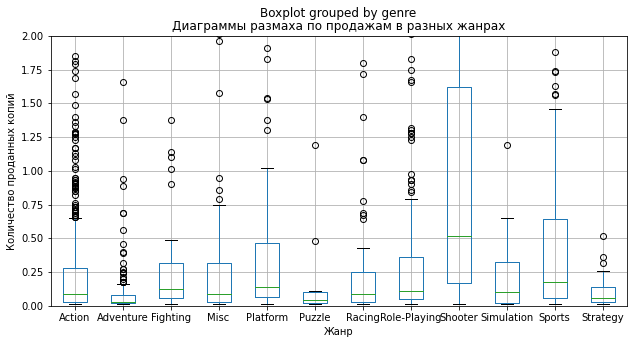

In [59]:
games_new[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,5))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 2)
plt.show()

### Составьте портрет пользователя каждого региона

*1.Самые популярные платформы*

In [60]:
games_new.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


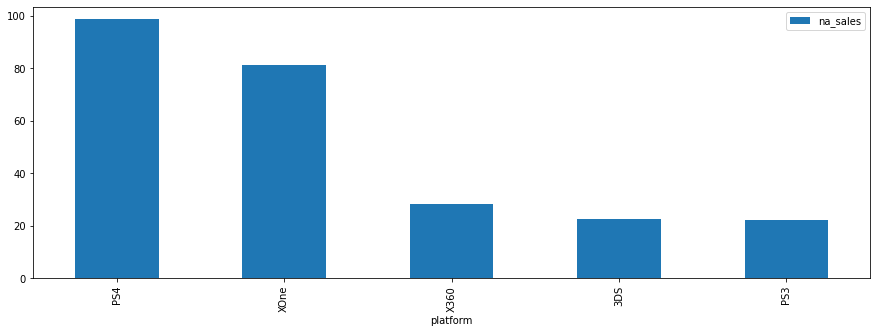

In [61]:
games_new.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').head().plot(kind = 'bar', figsize=(15,5));

Пользователи Северной Америки предпочитают PS4, XOne

In [62]:
games_new.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


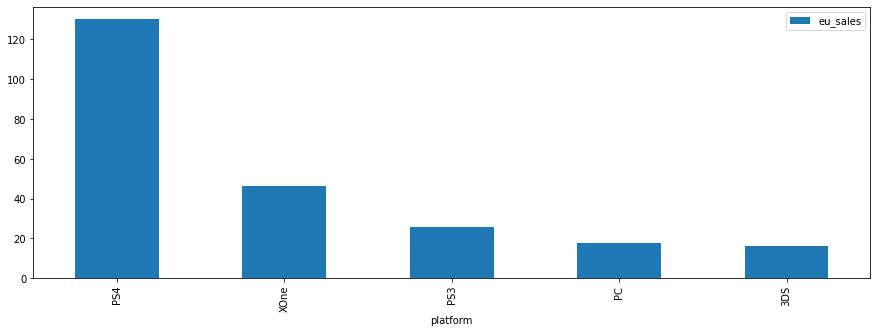

In [63]:
games_new.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').head().plot(kind = 'bar', figsize=(15,5));

Самые популярные в Европе PS4

In [64]:
games_new.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


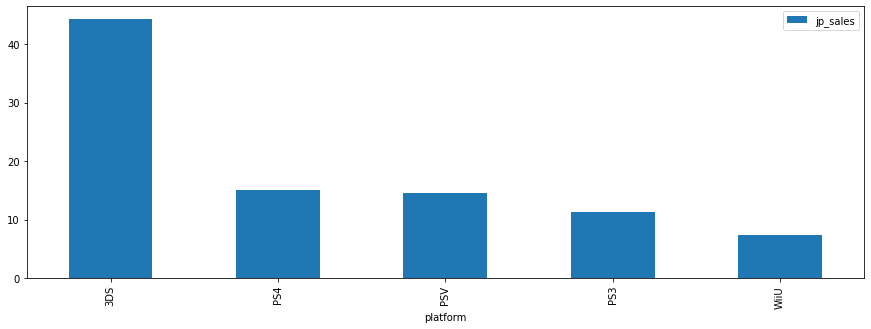

In [65]:
games_new.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').head().plot(kind = 'bar', figsize=(15,5));

В Японии в приоритете платформа 3DS, возмонжо потому что она японская

*2.Самые популярные жанры*

In [66]:
games_new.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [67]:
games_new.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [68]:
games_new.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


В Северной Америке и Европе пользователи отдают предпочтения одним жанрам: Shooter, Action, Sports. В отличие от них в Японии самый популярный жанр Role-Playing, но они также отдают предпочтение Action на 2 месте


*3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

In [69]:
ESRB = games_new.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
ND,58.95,56.90,64.72
T,34.07,14.78,38.95


Рейтинг влияет на продажи в Северной Америке и Европе

### Проверьте гипотезы

In [70]:
games_new_nan = games_new.dropna(subset=['user_score'])

*1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [71]:
XOne_game = games_new_nan[games_new_nan['platform'] == 'XOne']['user_score']
PC_game = games_new_nan[games_new_nan['platform'] == 'PC']['user_score']

alpha = 0.05

results = st.ttest_ind(XOne_game, PC_game)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [72]:
sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


*2.Средние пользовательские рейтинги жанров Action*

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [73]:
Action = games_new_nan[games_new_nan['genre'] == 'Action']['user_score']
Sports = games_new_nan[games_new_nan['genre'] == 'Sports']['user_score']

alpha = .05

results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные

### Общий вывод

Было проведено исследование данных продаж игр для разных платформ:

1. По результатам исследования получены данные о том, что среднее время актуального присутствия платформы на рынке составляет примерно 10 лет.
2. Наиболее популярные по продажам за всё время платформы: PS2, X360, PS3, Wii, DS. Большинство платформ появилось в 2000-х.
3. На основании данных за последние 3 года, лидируют по продажам: PS4, XOne. PC имеет тенденцию к росту к 2016 году
4. По платформам PS4, XOne можно сказать, что оценки критиков влияют на продажи, в отличие от оценок пользователей, которые не принимают во внимание
5. Можно выделить жанры с с высокими продажами: Action, Shooter, Sports, и с низкими: Strategy, Puzzle
6. Пользователи Северной Америки предпочитают PS4, XOne, cамые популярные в Европе PS4, в Японии в приоритете платформа 3DS, возмонжо потому что она японская
7. В Северной Америке и Европе пользователи отдают предпочтения одним жанрам: Shooter, Action, Sports. В отличие от них в Японии самый популярный жанр Role-Playing, но они также отдают предпочтение Action на 2 месте
